In [1]:
%matplotlib inline

In [78]:
import sys
import dlib
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib
import glob
import operator

In [38]:
# imagePath = "/datascience/data/imdb-wiki/imdb/03/nm0405103_rm1003861504_1990-11-24_2009.jpg"
imagePath = "/datascience/data/imdb-wiki/imdb/03/nm0405103_rm1007403008_1990-11-24_2014.jpg"
# imagePath = "/datascience/data/imdb-wiki/imdb/01/nm0000001_rm124825600_1899-5-10_1968.jpg"
# imagePath = "/datascience/data/imdb-wiki/imdb/01/nm0000001_rm946909184_1899-5-10_1968.jpg"

In [7]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

In [62]:
def show_image(arr):
    plt.imshow(cv2.cvtColor(arr, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [84]:
def detect_face(imagePath):
    img = cv2.imread(imagePath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detections = detector(gray, 1)
    print("Number of faces detected: {}".format(len(detections)))
    faces = []
    for k,d in enumerate(detections): 
        width = d.right() - d.left()
        height = d.bottom() - d.top()
        if width*height*100 / (gray.shape[0]*gray.shape[1]) < 0.05:
            print("Skipping ", width, height)
            continue
        crop_img = img[d.top():d.bottom(),d.left():d.right()]
        faces.append({'img':crop_img, 'orig': img, 'w': width, 'h': height, 'score': (width*height*100 / (gray.shape[0]*gray.shape[1]))})
    return faces
#     show_image(img)
#     for f in faces:
#         show_image(f)


In [90]:
i = 0
all_faces = []
for l in glob.glob("/datascience/data/imdb-wiki/imdb/00/nm0500200*"):
    all_faces.extend(detect_face(l))
    i+=1

Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 4
Number of faces detected: 0
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 0
Number of faces detected: 2
Number of faces detected: 3
Number of faces detected: 2
Number of faces detected: 3
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 2
Number of faces detected: 5
Number of faces detected: 1
Number of faces detected: 1
Number of faces detected: 1
Number of faces dete

15.842848557692308


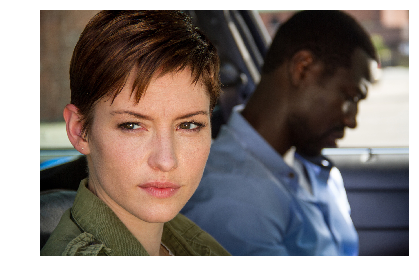

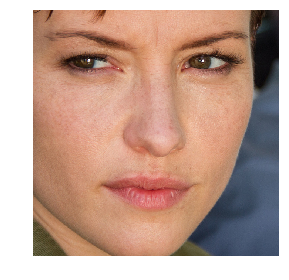

--------------------------------------------------------------------------------
12.52378512880562


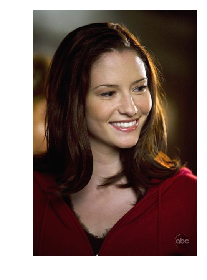

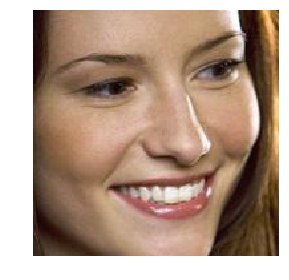

--------------------------------------------------------------------------------
10.561946902654867


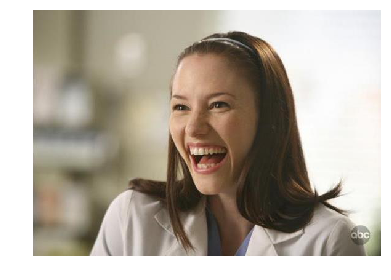

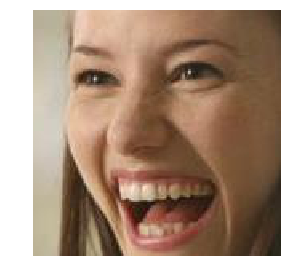

--------------------------------------------------------------------------------
8.791349531615925


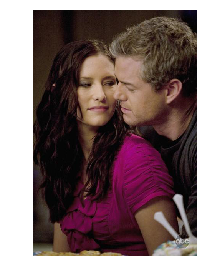

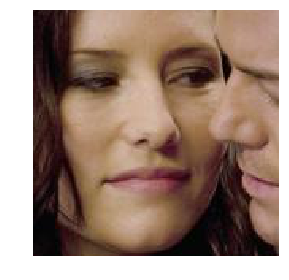

--------------------------------------------------------------------------------
8.791349531615925


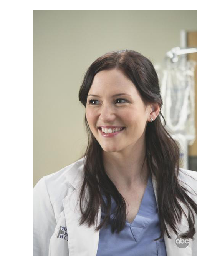

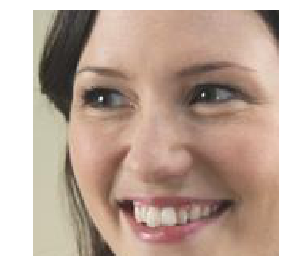

--------------------------------------------------------------------------------
8.791349531615925


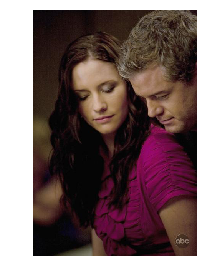

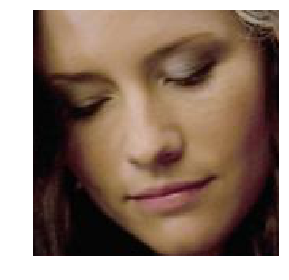

--------------------------------------------------------------------------------
8.791349531615925


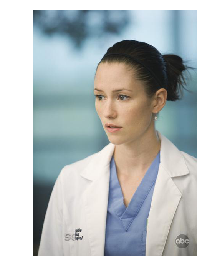

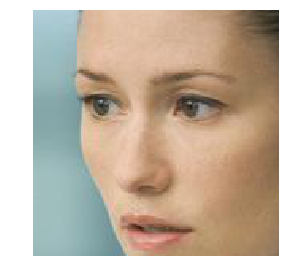

--------------------------------------------------------------------------------
8.791349531615925


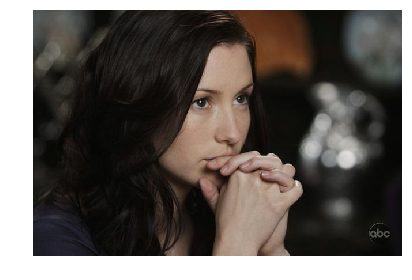

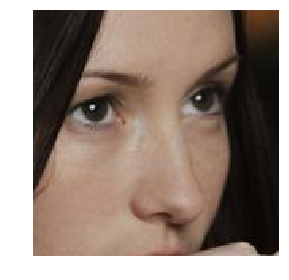

--------------------------------------------------------------------------------
7.432002596559559


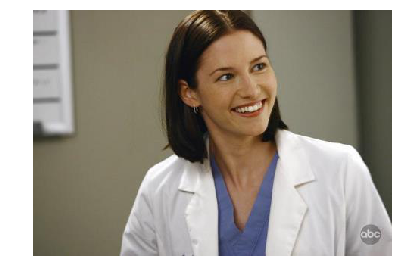

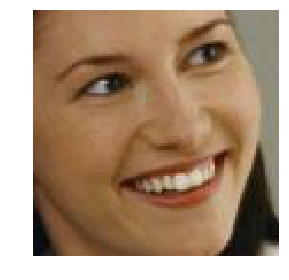

--------------------------------------------------------------------------------
6.876446280991735


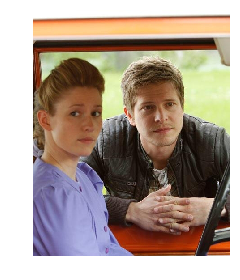

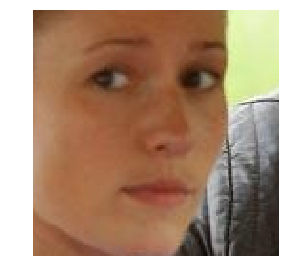

--------------------------------------------------------------------------------
6.103653169014085


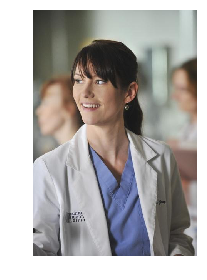

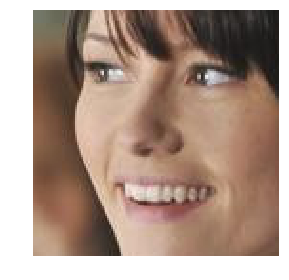

--------------------------------------------------------------------------------
6.089358899297424


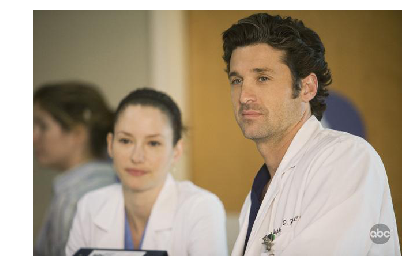

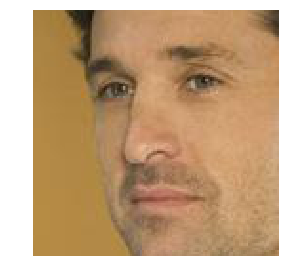

--------------------------------------------------------------------------------
6.089358899297424


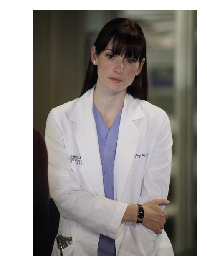

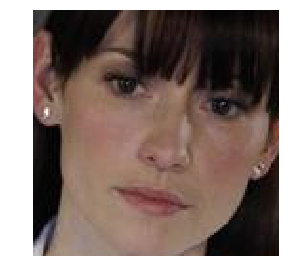

--------------------------------------------------------------------------------
6.089358899297424


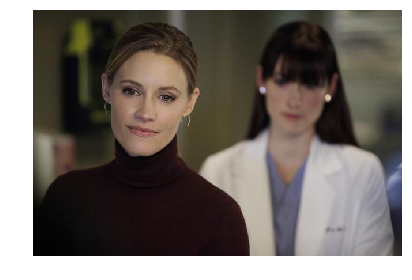

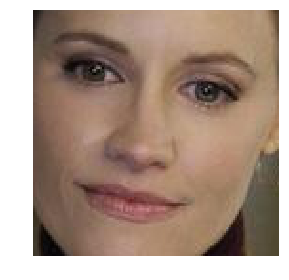

--------------------------------------------------------------------------------
6.089358899297424


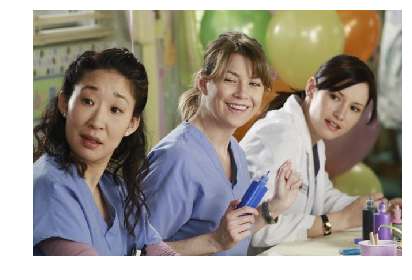

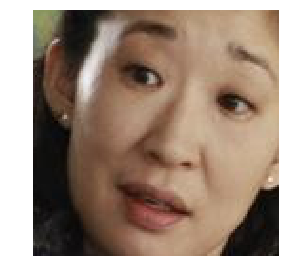

--------------------------------------------------------------------------------
6.089358899297424


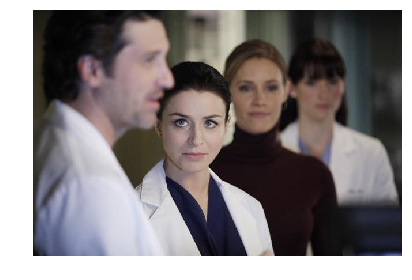

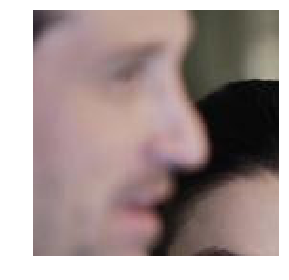

--------------------------------------------------------------------------------
5.508805614406779


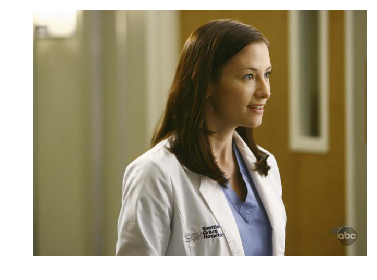

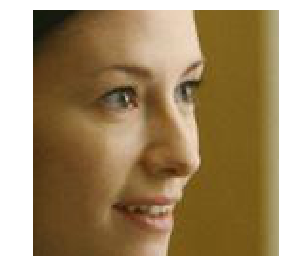

--------------------------------------------------------------------------------
4.775206611570248


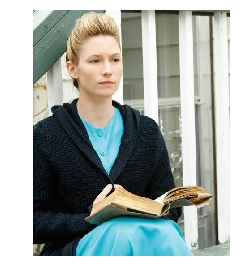

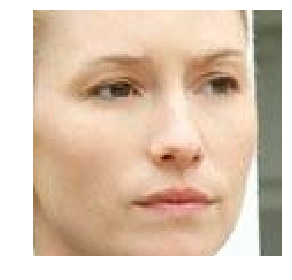

--------------------------------------------------------------------------------
4.775206611570248


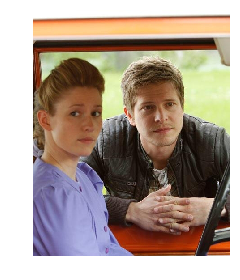

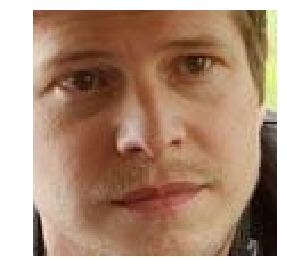

--------------------------------------------------------------------------------
4.775206611570248


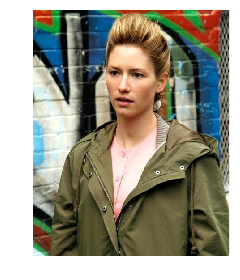

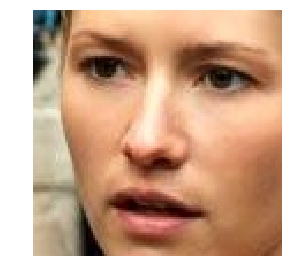

--------------------------------------------------------------------------------
4.268149882903981


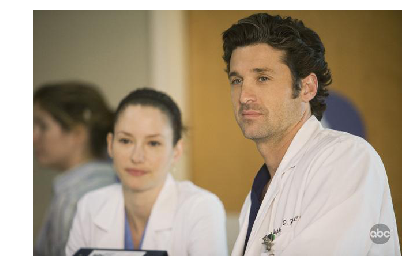

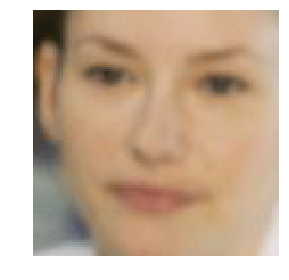

--------------------------------------------------------------------------------
4.268149882903981


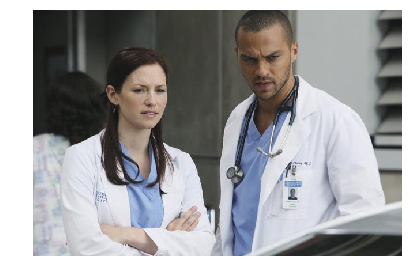

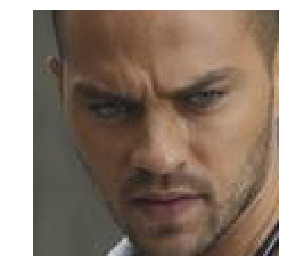

--------------------------------------------------------------------------------
4.268149882903981


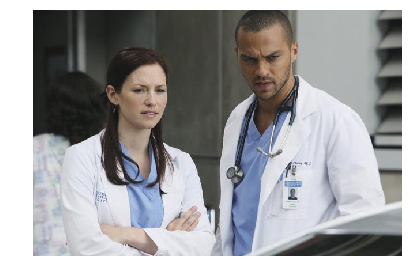

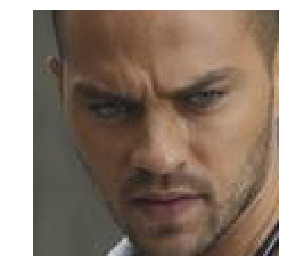

--------------------------------------------------------------------------------
4.248529411764705


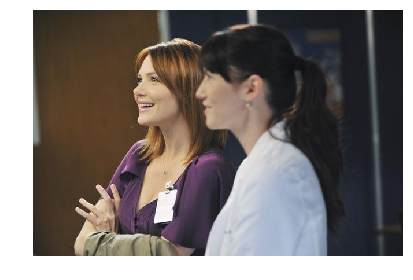

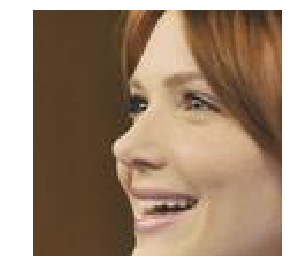

--------------------------------------------------------------------------------
4.228629976580796


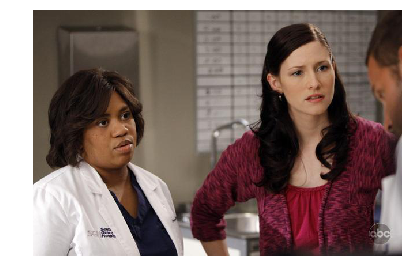

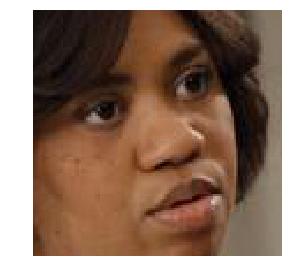

--------------------------------------------------------------------------------
4.228629976580796


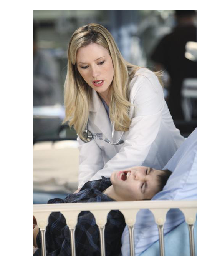

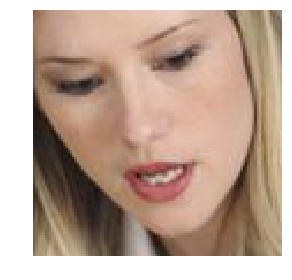

--------------------------------------------------------------------------------
4.228629976580796


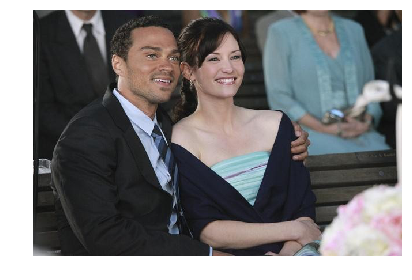

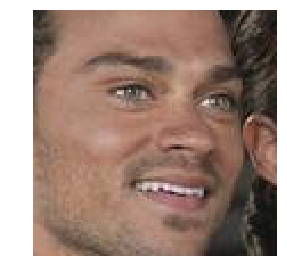

--------------------------------------------------------------------------------
4.228629976580796


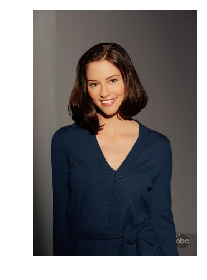

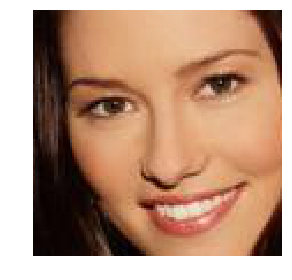

--------------------------------------------------------------------------------
4.228629976580796


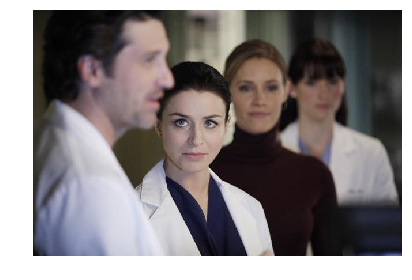

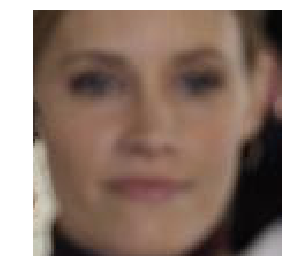

--------------------------------------------------------------------------------
4.228629976580796


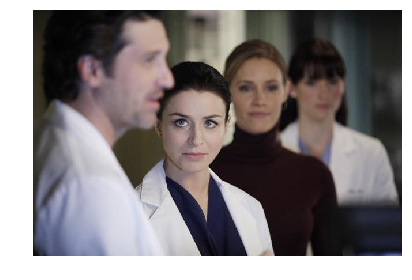

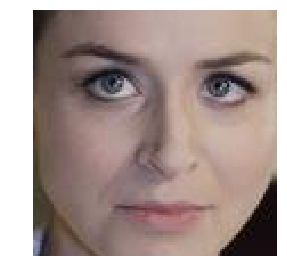

--------------------------------------------------------------------------------
4.189475995316159


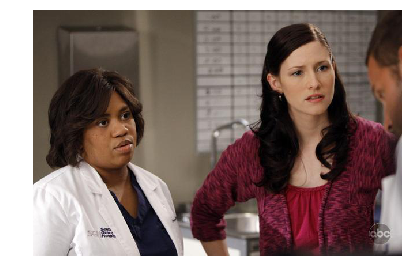

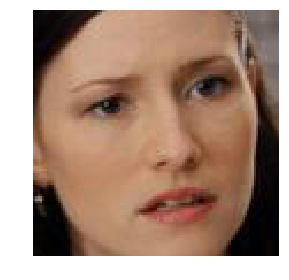

--------------------------------------------------------------------------------
4.189475995316159


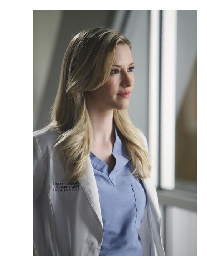

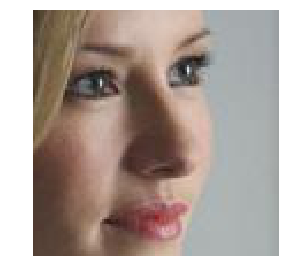

--------------------------------------------------------------------------------
4.189475995316159


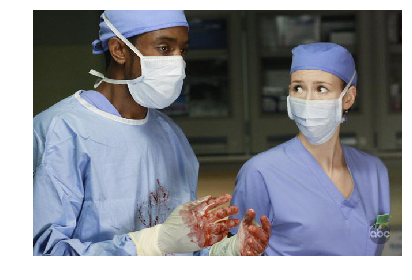

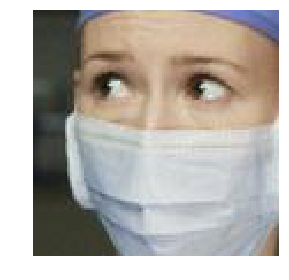

--------------------------------------------------------------------------------
4.189475995316159


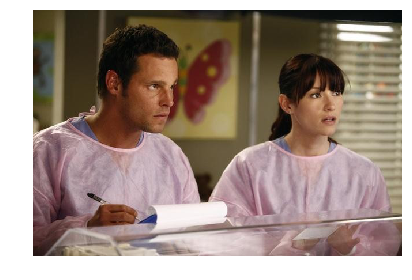

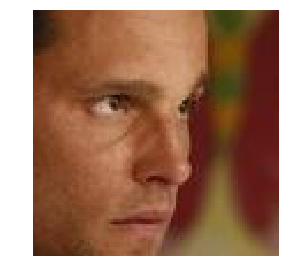

--------------------------------------------------------------------------------
4.189475995316159


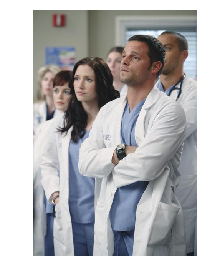

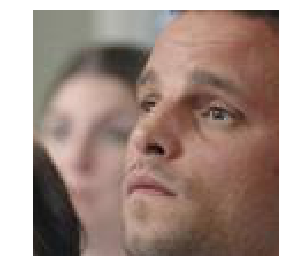

--------------------------------------------------------------------------------
3.6859332074175826


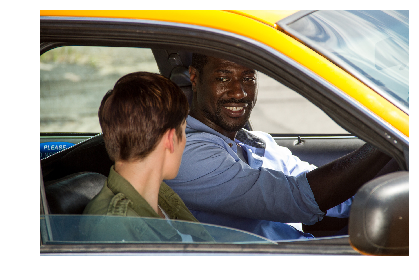

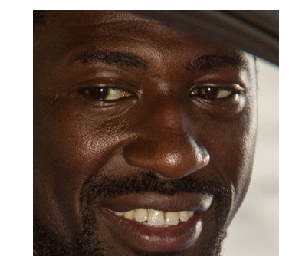

--------------------------------------------------------------------------------
3.6859332074175826


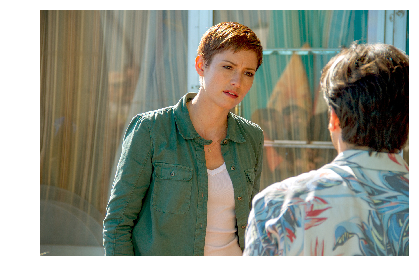

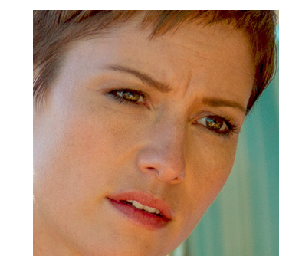

--------------------------------------------------------------------------------
3.6859332074175826


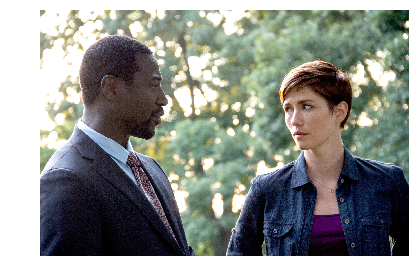

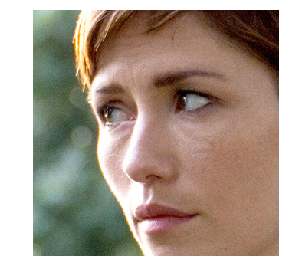

--------------------------------------------------------------------------------
3.6859332074175826


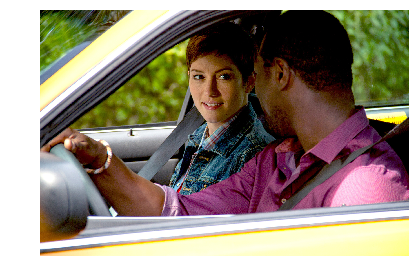

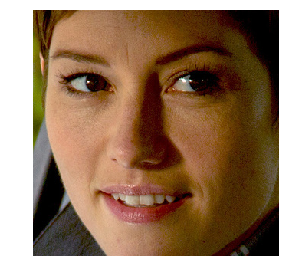

--------------------------------------------------------------------------------
3.568596352101507


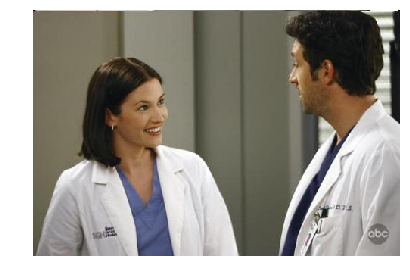

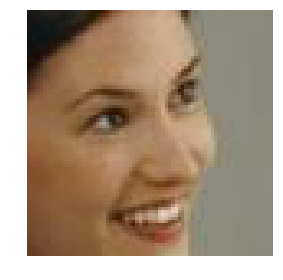

--------------------------------------------------------------------------------
3.309917355371901


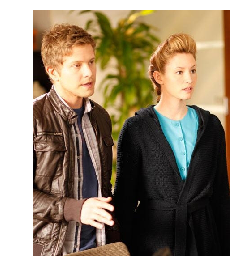

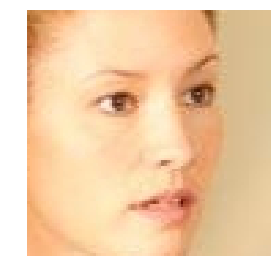

--------------------------------------------------------------------------------
3.309917355371901


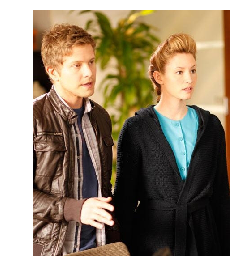

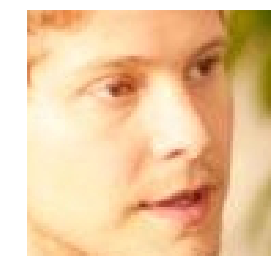

--------------------------------------------------------------------------------
2.963992974238876


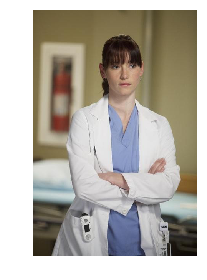

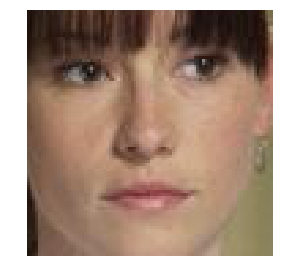

--------------------------------------------------------------------------------
2.963992974238876


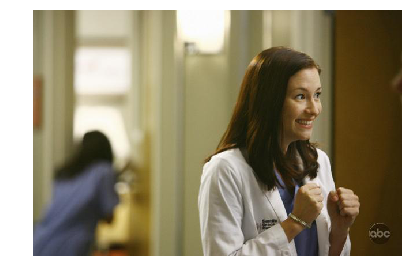

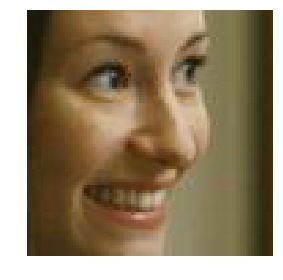

--------------------------------------------------------------------------------
2.963992974238876


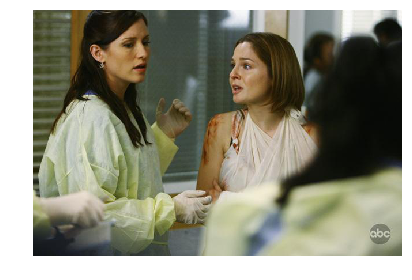

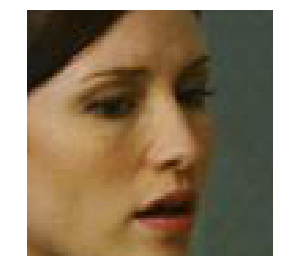

--------------------------------------------------------------------------------
2.963992974238876


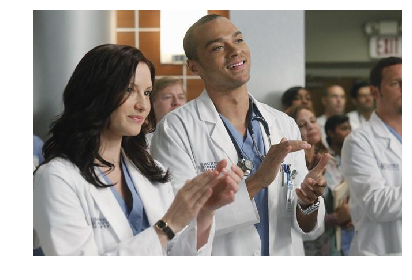

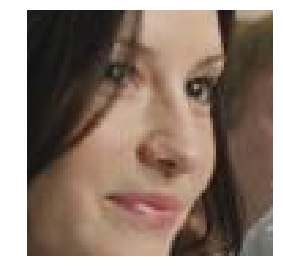

--------------------------------------------------------------------------------
2.963992974238876


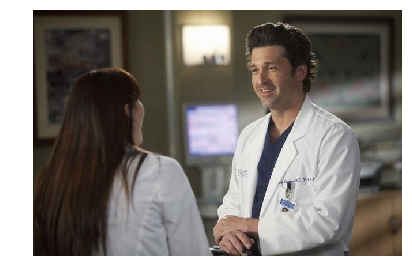

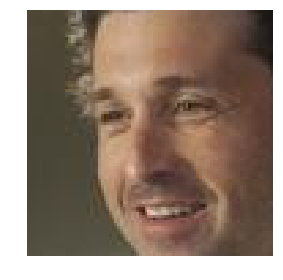

--------------------------------------------------------------------------------
2.963992974238876


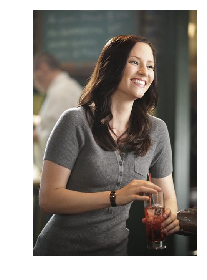

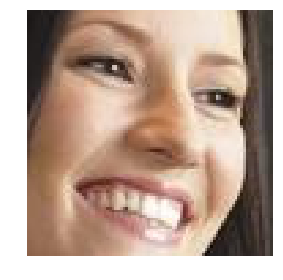

--------------------------------------------------------------------------------
2.963992974238876


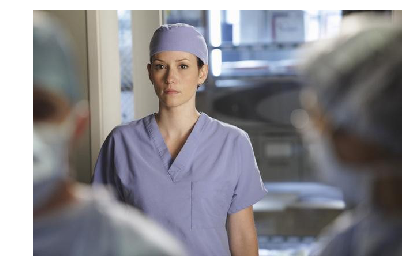

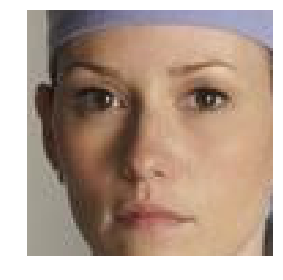

--------------------------------------------------------------------------------
2.963992974238876


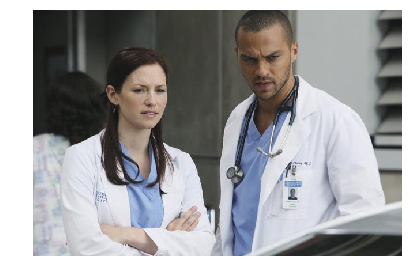

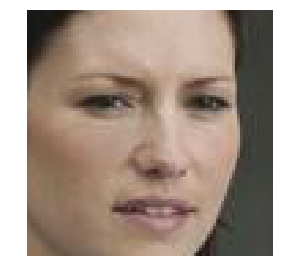

--------------------------------------------------------------------------------


In [91]:
for k in sorted(all_faces, key=lambda x:x['score'], reverse=True)[:50]:
    print(k['score'])
    show_image(k['orig'])
    show_image(k['img'])
    print("-"*80)